In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import matplotlib.pyplot as plt

## Data Dictionary
* Hotel: 
      H1 = Resort Hotel
      H2 = City Hotel
* is_canceled: Value indicating if the booking was canceled (1) or not (0)
* lead_time: Number of days that elapsed between the entering date of the booking into the PMS and the arrival date
* arrival_date_year: Year of arrival date
* arrival_date_month: Month of arrival date
* arrival_date_week_number: Week number of year for arrival date
* arrival_date_day_of_month: Day of arrival date
* stays_in_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* stays_in_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* adults: Number of adults
* children: Number of children
* babies: Number of babies
* meal: Type of meal booked. Categories are presented in standard hospitality meal packages:
      Undefined/SC – no meal package.
      BB –Bed & Breakfast.
      HB – Half board (breakfast and one other meal – usually dinner).
      FB – Full board (breakfast, lunch and dinner).
        
* country: Country of origin.
* market_segment: Market segment designation:
      TA - means “Travel Agents”
      TO - means “Tour Operators”
        
* distribution_channel: Booking distribution channel: TA & TO
* is_repeated_guest: Value indicating if the booking name was from a:
      repeated guest (1)
      not (0)
         
* previous_cancellations: Number of previous bookings that were cancelled by the customer prior to the current booking
* previous_bookings_not_canceled: Number of previous bookings not cancelled by the customer prior to the current booking
* reserved_room_type: Code of room type reserved. Code is presented instead of designation for anonymity reasons
* assigned_room_type: Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.
* booking_changes: Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation
* deposit_type: Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: 
       No Deposit – no deposit was made.
       Non Refund – a deposit was made in the value of the total stay cost.
       Refundable – a deposit was made with a value under the total cost of stay.
           
* agent: ID of the travel agency that made the booking
* company: ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons
* days_in_waiting_list: Number of days the booking was in the waiting list before it was confirmed to the customer
* customer_type: Type of booking, assuming one of four categories:
        Contract - when the booking has an allotment or other type of contract associated to it
        Group – when the booking is associated to a group
        Transient – when the booking is not part of a group or contract, and is not associated to other transient booking.
        Transient-party – when the booking is transient, but is associated to at least other transient booking
            
* adr: Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights
* required_car_parking_spaces: Number of car parking spaces required by the customer
* total_of_special_requests: Number of special requests made by the customer (e.g. twin bed or high floor)
* reservation_status: Reservation last status, assuming one of three categories:
        Canceled – booking was canceled by the customer.
        Check-Out – customer has checked in but already departed.
        No-Show – customer did not check-in and did inform the hotel of the reason why
            
* reservation_status_date: Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel


In [2]:
dataset = pd.read_csv("hotel_bookings.csv")
pd.set_option('display.max_columns', 32)

In [3]:
#show the first 5 lines
dataset.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
#show the last 5 lines
dataset.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


### Our Objective
For this case or this project our first and final objective is determining whether a **booking** were **canceled** or **not**

#### Descriptive analysis
first let's start with a descriptive analysis by examining the data types and if there's any missing data or not

In [5]:
dataset.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [6]:
dataset.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

We can see that the *country* column has 488 missing data & 16340 for the *agent* column and the company column more than 90% of our data that's why we are gonna remove the *company* column

In [7]:
dataset.shape

(119390, 32)

In [8]:
dataset.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [9]:
dataset["is_canceled"].value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

a very important thing we have to take in consideration while using score metrics is **we don't have to count on accuracy b'coz of imbalanced classes** we have

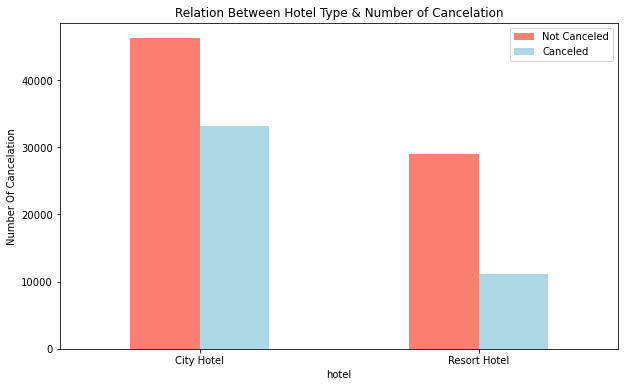

In [10]:
pd.crosstab(dataset.hotel, dataset.is_canceled).plot(kind='bar', figsize=(10,6), color=['salmon', 'lightblue'])
plt.title("Relation Between Hotel Type & Number of Cancelation")
plt.ylabel("Number Of Cancelation")
plt.legend(["Not Canceled", "Canceled"])
plt.xticks(rotation=0);

We can see that people who make a reservation in Resort Hotel don't canceled a lot like people from City Hotel

<AxesSubplot:xlabel='is_canceled'>

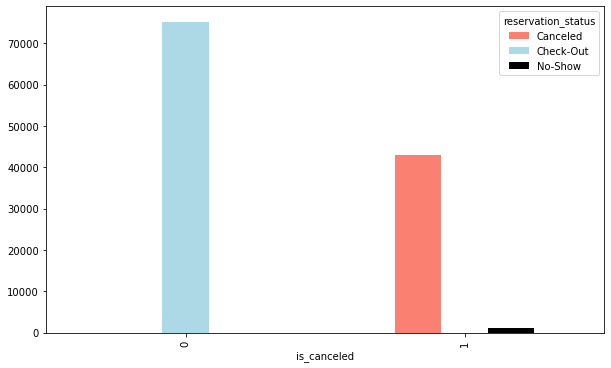

In [11]:
pd.crosstab(dataset.is_canceled, dataset.reservation_status).plot(kind='bar', figsize=(10,6), color=['salmon', 'lightblue', 'black'])

In [12]:
dataset["country"].value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 177, dtype: int64

From **value_counts()** we can see that most ppl are coming from PRT

In [13]:
dataset["market_segment"].value_counts()

Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

In [14]:
filter = dataset["is_canceled"] == 1
data = dataset[filter]
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22
10,Resort Hotel,1,23,2015,July,27,1,0,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,240.0,NaN,0,Transient,123.0,0,0,Canceled,2015-06-23
27,Resort Hotel,1,60,2015,July,27,1,2,5,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,240.0,NaN,0,Transient,107.0,0,2,Canceled,2015-05-11
32,Resort Hotel,1,96,2015,July,27,1,2,8,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,E,E,0,No Deposit,NaN,NaN,0,Transient,108.3,0,2,Canceled,2015-05-29


In [15]:
pd.DataFrame(data["market_segment"].value_counts())

,market_segment
Online TA,20739
Groups,12097
Offline TA/TO,8311
Direct,1934
Corporate,992
Complementary,97
Aviation,52
Undefined,2


Most people who canceld are from Online TA (*travel agenct*) & also 

In [16]:
pd.DataFrame(data["customer_type"].value_counts())

,customer_type
Transient,36514
Transient-Party,6389
Contract,1262
Group,59


Customer who are under the Transient type they take a big part in canceling there reservation

##### Busy Months

In [17]:
dataset["arrival_date_month"].value_counts()

August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

In [18]:
#h1 is the resort hotel
h1 = dataset["hotel"] == "Resort Hotel"
h1_months_filter = dataset[h1]
h1_months = h1_months_filter["arrival_date_month"].value_counts().reset_index()

In [19]:
h1_months

,index,arrival_date_month
0,August,4894
1,July,4573
2,April,3609
3,May,3559
4,October,3555
5,March,3336
6,September,3108
7,February,3103
8,June,3045
9,December,2648


In [20]:
#h2 is the city hotel
h2 = dataset["hotel"] == "City Hotel"
h2_months_filter = dataset[h2]
h2_months = h2_months_filter["arrival_date_month"].value_counts().reset_index()

In [21]:
h2_months

,index,arrival_date_month
0,August,8983
1,May,8232
2,July,8088
3,June,7894
4,October,7605
5,April,7480
6,September,7400
7,March,6458
8,February,4965
9,November,4357


In [22]:
final_months = h1_months.merge(h2_months,on='index')
final_months.columns=['month','no of guests in resort','no of guest in city hotel']
final_months

,month,no of guests in resort,no of guest in city hotel
0,August,4894,8983
1,July,4573,8088
2,April,3609,7480
3,May,3559,8232
4,October,3555,7605
5,March,3336,6458
6,September,3108,7400
7,February,3103,4965
8,June,3045,7894
9,December,2648,4132


In [23]:
import sort_dataframeby_monthorweek as sd
sorted_month = sd.Sort_Dataframeby_Month(df= final_months,monthcolumnname='month')

In [24]:
sorted_month

,month,no of guests in resort,no of guest in city hotel
0,January,2193,3736
1,February,3103,4965
2,March,3336,6458
3,April,3609,7480
4,May,3559,8232
5,June,3045,7894
6,July,4573,8088
7,August,4894,8983
8,September,3108,7400
9,October,3555,7605


In [25]:
sorted_month["no of guests in resort"]

0     2193
1     3103
2     3336
3     3609
4     3559
5     3045
6     4573
7     4894
8     3108
9     3555
10    2437
11    2648
Name: no of guests in resort, dtype: int64

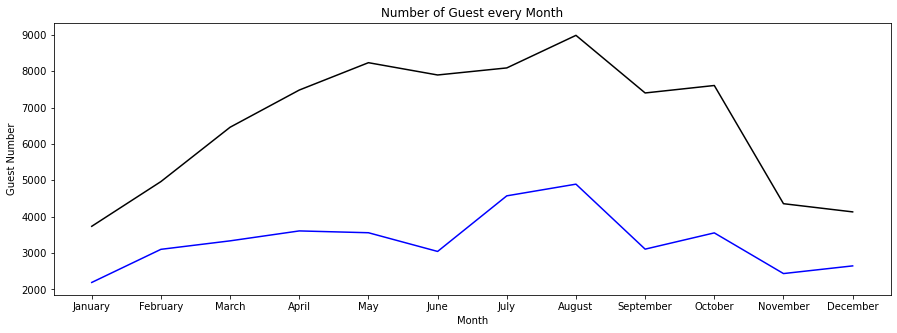

In [26]:
fig = plt.figure(figsize=(15,5))
plt.plot(sorted_month["month"], sorted_month["no of guests in resort"], color = 'blue')
plt.plot(sorted_month["month"], sorted_month["no of guest in city hotel"], color = 'black')

plt.title('Number of Guest every Month')
plt.xlabel('Month')
plt.ylabel('Guest Number')
plt.show()

Between June & August the Resort Hotel get more guests coz it's summer period, But at the other hand we can find thet city hotel during the period of Spring and Autumn get more visitors

### Price Of a Night 

In [27]:
#starting first by creating new df where i've only ppl who haven't canceled soo is_canceled = 0
resort_data = dataset[(dataset["is_canceled"] == 0) & (dataset["hotel"] == "Resort Hotel")]
city_data = dataset[(dataset["is_canceled"] == 0) & (dataset["hotel"] == "City Hotel")]

#creating 2 df with month and the price of every night in both hotels
resort_hotel = resort_data.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel = city_data.groupby(['arrival_date_month'])['adr'].mean().reset_index()

#merging both df
price_df = resort_hotel.merge(city_hotel,on='arrival_date_month')
price_df.columns=['month','Price in resort','Price in city hotel']

#sorting our df
price_df_night = sd.Sort_Dataframeby_Month(df= price_df ,monthcolumnname='month')

In [28]:
price_df_night

,month,Price in resort,Price in city hotel
0,January,48.708919,82.160634
1,February,54.147478,86.183025
2,March,57.012487,90.170722
3,April,75.867816,111.856824
4,May,76.657558,120.445842
5,June,107.921869,117.702075
6,July,150.122528,115.563810
7,August,181.205892,118.412083
8,September,96.416860,112.598452
9,October,61.727505,101.745956


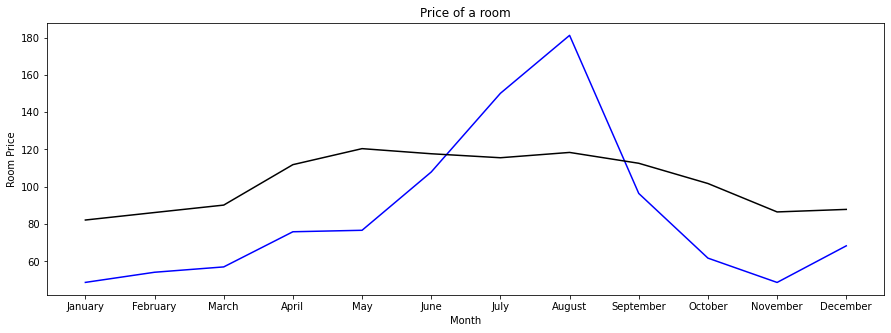

In [29]:
#plotting the previous result
fig = plt.figure(figsize=(15,5))
plt.plot(price_df_night["month"], price_df_night["Price in resort"], color="blue")
plt.plot(price_df_night["month"], price_df_night["Price in city hotel"], color = "black")
plt.title('Price of a room')
plt.xlabel('Month')
plt.ylabel('Room Price')
plt.show()

Somehow we can find that the *Resort hotel* room price get **increased by July and August** and that coz of the summer period but in the *City hotel* we can that the price it **increase a little bit during Spring & Autumn** 

## Data Processing

In [30]:
# remove rows where adults, babies and children hving 0

filter = (dataset.children == 0) & (dataset.adults == 0) & (dataset.babies == 0)
dataset = dataset[~filter]

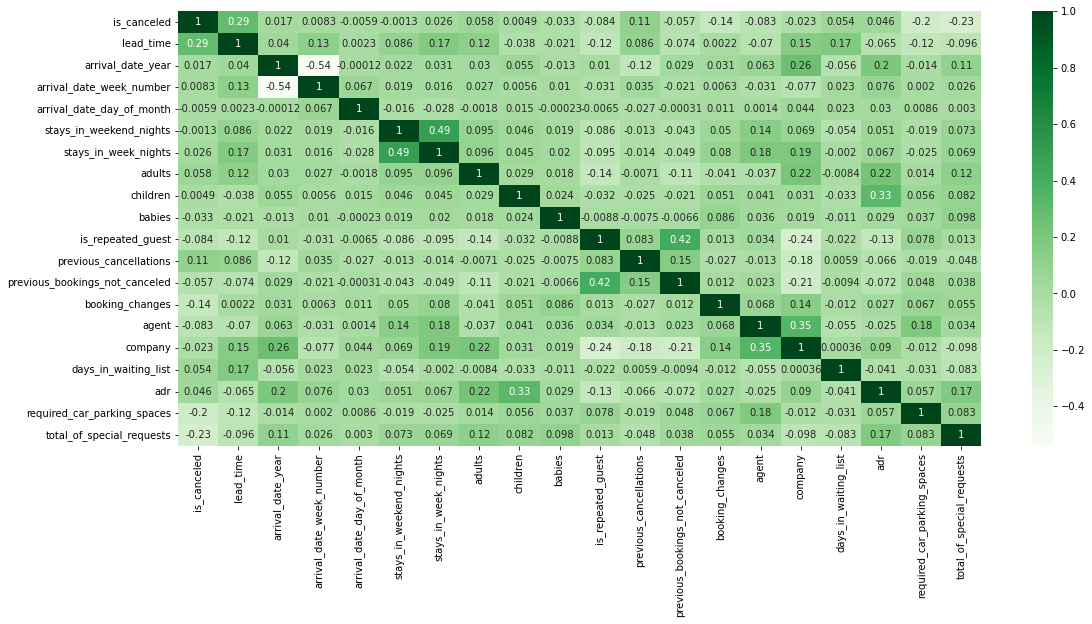

In [31]:
#create a corr map
import seaborn as sns
plt.figure(figsize=(18, 8))
sns.heatmap(dataset.corr(), annot=True, cmap="Greens");

In [32]:
#removing val with a negative correlation with is_canceled
correlation = dataset.corr()['is_canceled'].abs().sort_values(ascending = False)
correlation

is_canceled                       1.000000
lead_time                         0.292876
total_of_special_requests         0.234877
required_car_parking_spaces       0.195701
booking_changes                   0.144832
previous_cancellations            0.110139
is_repeated_guest                 0.083745
agent                             0.083389
adults                            0.058182
previous_bookings_not_canceled    0.057365
days_in_waiting_list              0.054301
adr                               0.046492
babies                            0.032569
stays_in_week_nights              0.025542
company                           0.023439
arrival_date_year                 0.016622
arrival_date_week_number          0.008315
arrival_date_day_of_month         0.005948
children                          0.004862
stays_in_weekend_nights           0.001323
Name: is_canceled, dtype: float64

In [33]:
neg_columns = ['days_in_waiting_list', 'arrival_date_year', 'arrival_date_year', 'assigned_room_type', 'booking_changes', 'reservation_status', 'country', 'days_in_waiting_list']
dataset.drop(neg_columns, axis = 1, inplace = True)

In [34]:
dataset.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
deposit_type                           0
agent                              16280
company                           112442
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special

In [35]:
# filling null values with zero
dataset.fillna(0, inplace = True)

In [36]:
dataset.shape

(119210, 26)

In [37]:
dataset.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
deposit_type                      0
agent                             0
company                           0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status_date           0
dtype: int64

In [38]:
# creating numerical and categorical dataframes

category_cols = [col for col in dataset.columns if dataset[col].dtype == 'O']
category_cols

['hotel',
 'arrival_date_month',
 'meal',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status_date']

In [39]:
df_category = dataset[category_cols]
df_category.head()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,reservation_status_date
0,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015-07-01
1,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015-07-01
2,Resort Hotel,July,BB,Direct,Direct,A,No Deposit,Transient,2015-07-02
3,Resort Hotel,July,BB,Corporate,Corporate,A,No Deposit,Transient,2015-07-02
4,Resort Hotel,July,BB,Online TA,TA/TO,A,No Deposit,Transient,2015-07-03


In [40]:
#reservation status should be convert to date time
df_category['reservation_status_date'] = pd.to_datetime(df_category['reservation_status_date'])

df_category['year'] = df_category['reservation_status_date'].dt.year
df_category['month'] = df_category['reservation_status_date'].dt.month
df_category['day'] = df_category['reservation_status_date'].dt.day

In [41]:
df_category.drop(['reservation_status_date','arrival_date_month'] , axis = 1, inplace = True)

In [42]:
df_category.head()

,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day
0,Resort Hotel,BB,Direct,Direct,C,No Deposit,Transient,2015,7,1
1,Resort Hotel,BB,Direct,Direct,C,No Deposit,Transient,2015,7,1
2,Resort Hotel,BB,Direct,Direct,A,No Deposit,Transient,2015,7,2
3,Resort Hotel,BB,Corporate,Corporate,A,No Deposit,Transient,2015,7,2
4,Resort Hotel,BB,Online TA,TA/TO,A,No Deposit,Transient,2015,7,3


In [43]:
# printing unique values of each column
for col in df_category.columns:
    print(f"{col}: \n{df_category[col].unique()}\n")

hotel: 
['Resort Hotel' 'City Hotel']

meal: 
['BB' 'FB' 'HB' 'SC' 'Undefined']

market_segment: 
['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']

distribution_channel: 
['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']

reserved_room_type: 
['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'B']

deposit_type: 
['No Deposit' 'Refundable' 'Non Refund']

customer_type: 
['Transient' 'Contract' 'Transient-Party' 'Group']

year: 
[2015 2014 2016 2017]

month: 
[ 7  5  4  6  3  8  9  1 11 10 12  2]

day: 
[ 1  2  3  6 22 23  5  7  8 11 15 16 29 19 18  9 13  4 12 26 17 10 20 14
 30 28 25 21 27 24 31]



In [44]:
#transforming catgorical data to numbers
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df_category['hotel'] = le.fit_transform(df_category['hotel'])
df_category['meal'] = le.fit_transform(df_category['meal'])
df_category['market_segment'] = le.fit_transform(df_category['market_segment'])
df_category['distribution_channel'] = le.fit_transform(df_category['distribution_channel'])
df_category['reserved_room_type'] = le.fit_transform(df_category['reserved_room_type'])
df_category['deposit_type'] = le.fit_transform(df_category['deposit_type'])
df_category['customer_type'] = le.fit_transform(df_category['customer_type'])
df_category['year'] = le.fit_transform(df_category['year'])

In [45]:
df_category.head()

,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day
0,1,0,3,1,2,0,2,1,7,1
1,1,0,3,1,2,0,2,1,7,1
2,1,0,3,1,0,0,2,1,7,2
3,1,0,2,0,0,0,2,1,7,2
4,1,0,6,3,0,0,2,1,7,3


In [46]:
#now let's work on num columns
num_df = dataset.drop(columns = category_cols, axis = 1)
#num_df["adr"] = num_df.fillna(method ='ffill', inplace = True)
num_df.drop('is_canceled', axis = 1, inplace = True)
num_df.head()

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,agent,company,adr,required_car_parking_spaces,total_of_special_requests
0,342,27,1,0,0,2,0.0,0,0,0,0,0.0,0.0,0.0,0,0
1,737,27,1,0,0,2,0.0,0,0,0,0,0.0,0.0,0.0,0,0
2,7,27,1,0,1,1,0.0,0,0,0,0,0.0,0.0,75.0,0,0
3,13,27,1,0,1,1,0.0,0,0,0,0,304.0,0.0,75.0,0,0
4,14,27,1,0,2,2,0.0,0,0,0,0,240.0,0.0,98.0,0,1


In [47]:
num_df.isna().sum()

lead_time                         0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
agent                             0
company                           0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
dtype: int64

In [48]:
num_df.var()

lead_time                         11422.361808
arrival_date_week_number            184.990111
arrival_date_day_of_month            77.107192
stays_in_weekend_nights               0.990258
stays_in_week_nights                  3.599010
adults                                0.330838
children                              0.159070
babies                                0.009508
is_repeated_guest                     0.030507
previous_cancellations                0.713887
previous_bookings_not_canceled        2.244415
agent                             11485.169679
company                            2897.684308
adr                                2543.589039
required_car_parking_spaces           0.060201
total_of_special_requests             0.628652
dtype: float64

In [49]:
num_df.shape, df_category.shape

((119210, 16), (119210, 10))

In [50]:
num_df.var()

lead_time                         11422.361808
arrival_date_week_number            184.990111
arrival_date_day_of_month            77.107192
stays_in_weekend_nights               0.990258
stays_in_week_nights                  3.599010
adults                                0.330838
children                              0.159070
babies                                0.009508
is_repeated_guest                     0.030507
previous_cancellations                0.713887
previous_bookings_not_canceled        2.244415
agent                             11485.169679
company                            2897.684308
adr                                2543.589039
required_car_parking_spaces           0.060201
total_of_special_requests             0.628652
dtype: float64

In [51]:
#let's concat our cat & num dataframes & spliting it
X = pd.concat([df_category, num_df], axis = 1)
y = dataset["is_canceled"]

In [52]:
X.shape, y.shape

((119210, 26), (119210,))

In [55]:
# splitting data into training set and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify= y.values,test_size = 0.30)

### Modeling

In [56]:
#let's try 6 models and then decide which one to keep on
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

#confusion matrix
from sklearn.metrics import precision_score

#### Logistic Regression

In [57]:
#Logistic Regression
logisticR = LogisticRegression()
logisticR.fit(X_train, y_train)
lr_predict = logisticR.predict(X_test)

prec_score_logisticR = precision_score(y_test, lr_predict)

print(f"Precision Score : {prec_score_logisticR}")

Precision Score : 0.7368630573248408


C:\Users\AYOOB\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Decision Tree Classifier

In [58]:
#DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc_predict = dtc.predict(X_test)

prec_score_dtc = precision_score(y_test, dtc_predict)

print(f"Precision Score : {prec_score_dtc}")

Precision Score : 0.9321533923303835


#### SVC

In [59]:
#SVC
svc = DecisionTreeClassifier()
svc.fit(X_train, y_train)
svc_predict = dtc.predict(X_test)

prec_score_svc = precision_score(y_test, svc_predict)

print(f"Precision Score : {prec_score_svc}")

Precision Score : 0.9321533923303835


#### MLPClassifier

In [60]:
#MLPClassifier
mlpc = MLPClassifier()
mlpc.fit(X_train, y_train)
mlpc_predict = mlpc.predict(X_test)

prec_score_mlpc = precision_score(y_test, mlpc_predict)

print(f"Precision Score : {prec_score_mlpc}")

Precision Score : 0.9987864077669902


So here we see that **MLPClassifier** gives us the best precision score, that's why we can take it as the best model for our project